# Lab 2 Alpha-expansion

In [1]:
import copy
import numpy as np

from numpy.random import shuffle
from numba import njit
import matplotlib.pyplot as plt
from tqdm import tqdm

import funcs as f
import utils as utl

In [2]:
from time import time
start = time()

---

Input size:  (64, 64)
dtype: uint8 | max: 224 | min: 36


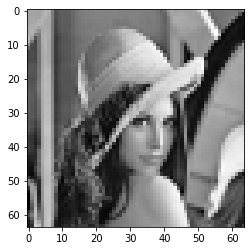

In [3]:
C = np.array([1, 128, 255])
repeats = 5
img = utl.import_img("input.png", bw=True, newshape=(64,64))

# Main

In [4]:
labeling = f.initial_labeling(img, C)

for iteration in tqdm(range(repeats)):
    a_shuffle = np.copy(C)
    shuffle(a_shuffle)
    
    for i in range(C.size):

        # 1) alpha_i
        a_i = a_shuffle[i]

        # 2) initial labeling
        k_init = labeling

        # 3) init new graph
        g = f.init_g(img, k_init, a_i, scale=40)

        # 4) solve for new binary task
        res = f.Ford_Falkerson(img, g)
        labeling = f.translate_to_labeling(res, k_init, a_i)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:15<00:00,  3.15s/it]


Time: 16.35189652442932


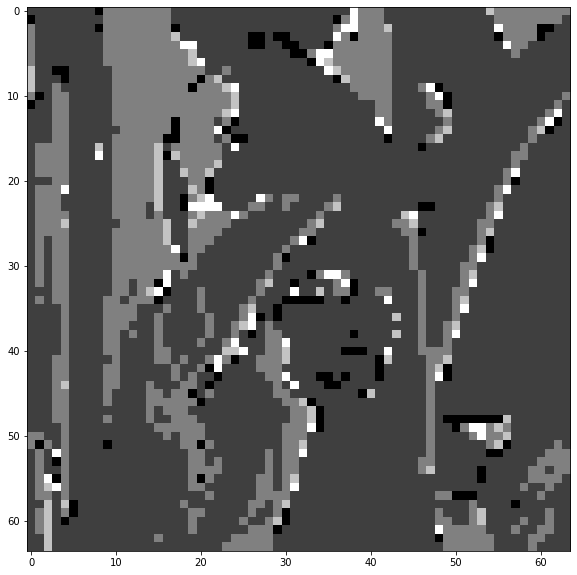

In [5]:
print(f"Time: {time() - start}")
plt.subplots(figsize=(10, 10))
plt.imshow(np.reshape(labeling, (64,64)), cmap='gray')

---